# Dignostic Analysis

This jupyter notebook includes analysis codes and vistualization for the Diagnostic pages.

In [2]:
# Import needed libraries
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# make plots show inside the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
#Reading the selected dataset
df = pd.read_csv("processed_data.csv")
df.head()

,Unnamed: 0,Sex,Age,Hypertension,Heart Disease,Married,Work Type,Residence Type,Glucose,BMI,Smoking?,Stroke
0,0,Male,67.0,False,True,True,Private,Urban,228.69,36.6,formerly smoked,True
1,1,Female,61.0,False,False,True,Self-employed,Rural,202.21,0.0,never smoked,True
2,2,Male,80.0,False,True,True,Private,Rural,105.92,32.5,never smoked,True
3,3,Female,49.0,False,False,True,Private,Urban,171.23,34.4,smokes,True
4,4,Female,79.0,True,False,True,Self-employed,Rural,174.12,24.0,never smoked,True


In [5]:
#Checking data types
df.dtypes

Unnamed: 0          int64
Sex                object
Age               float64
Hypertension         bool
Heart Disease        bool
Married              bool
Work Type          object
Residence Type     object
Glucose           float64
BMI               float64
Smoking?           object
Stroke               bool
dtype: object

In [6]:
# Unique values for each feature (categorical inspection)
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].unique()[:7])  # show first 20 unique values


--- Unnamed: 0 ---
[0 1 2 3 4 5 6]

--- Sex ---
['Male' 'Female' 'Other']

--- Age ---
[67. 61. 80. 49. 79. 81. 74.]

--- Hypertension ---
[False  True]

--- Heart Disease ---
[ True False]

--- Married ---
[ True False]

--- Work Type ---
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

--- Residence Type ---
['Urban' 'Rural']

--- Glucose ---
[228.69 202.21 105.92 171.23 174.12 186.21  70.09]

--- BMI ---
[36.6  0.  32.5 34.4 24.  29.  27.4]

--- Smoking? ---
['formerly smoked' 'never smoked' 'smokes' 'Unknown']

--- Stroke ---
[ True False]


In [7]:
#Changed bool and categorical veriables into integers with data types changes and one-hot coding
df = df.copy()

# Convert booleans to int
for col in df.select_dtypes(include="bool").columns:
    df[col] = df[col].astype(int)

# One-hot encode categorical columns
cat_cols = df.select_dtypes(include="object").columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

df.head()

,Unnamed: 0,Age,Hypertension,Heart Disease,Married,Glucose,BMI,Stroke,Sex_Male,Sex_Other,Work Type_Never_worked,Work Type_Private,Work Type_Self-employed,Work Type_children,Residence Type_Urban,Smoking?_formerly smoked,Smoking?_never smoked,Smoking?_smokes
0,0,67.0,0,1,1,228.69,36.6,1,True,False,False,True,False,False,True,True,False,False
1,1,61.0,0,0,1,202.21,0.0,1,False,False,False,False,True,False,False,False,True,False
2,2,80.0,0,1,1,105.92,32.5,1,True,False,False,True,False,False,False,False,True,False
3,3,49.0,0,0,1,171.23,34.4,1,False,False,False,True,False,False,True,False,False,True
4,4,79.0,1,0,1,174.12,24.0,1,False,False,False,False,True,False,False,False,True,False


In [8]:
#Changing all features into Integers
df = df.astype(int)
df.dtypes.head(10)

#Rearranged features
df = df[
    [
        'Age',
        'Hypertension',
        'Heart Disease',
        #'Married',  # removed married column
        'Glucose',
        'BMI',
        'Sex_Male',
        'Sex_Other',
        'Work Type_Never_worked',
        'Work Type_Private',
        'Work Type_Self-employed',
        'Work Type_children',
        'Residence Type_Urban',
        'Smoking?_formerly smoked',
        'Smoking?_never smoked',
        'Smoking?_smokes',
        'Stroke'
    ]
]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       5110 non-null   int64
 1   Hypertension              5110 non-null   int64
 2   Heart Disease             5110 non-null   int64
 3   Glucose                   5110 non-null   int64
 4   BMI                       5110 non-null   int64
 5   Sex_Male                  5110 non-null   int64
 6   Sex_Other                 5110 non-null   int64
 7   Work Type_Never_worked    5110 non-null   int64
 8   Work Type_Private         5110 non-null   int64
 9   Work Type_Self-employed   5110 non-null   int64
 10  Work Type_children        5110 non-null   int64
 11  Residence Type_Urban      5110 non-null   int64
 12  Smoking?_formerly smoked  5110 non-null   int64
 13  Smoking?_never smoked     5110 non-null   int64
 14  Smoking?_smokes           5110 non-null 

In [9]:
#Saved the csv file for model training steps
#df.to_csv("processed_data_clean_all_integers.csv", index=False)

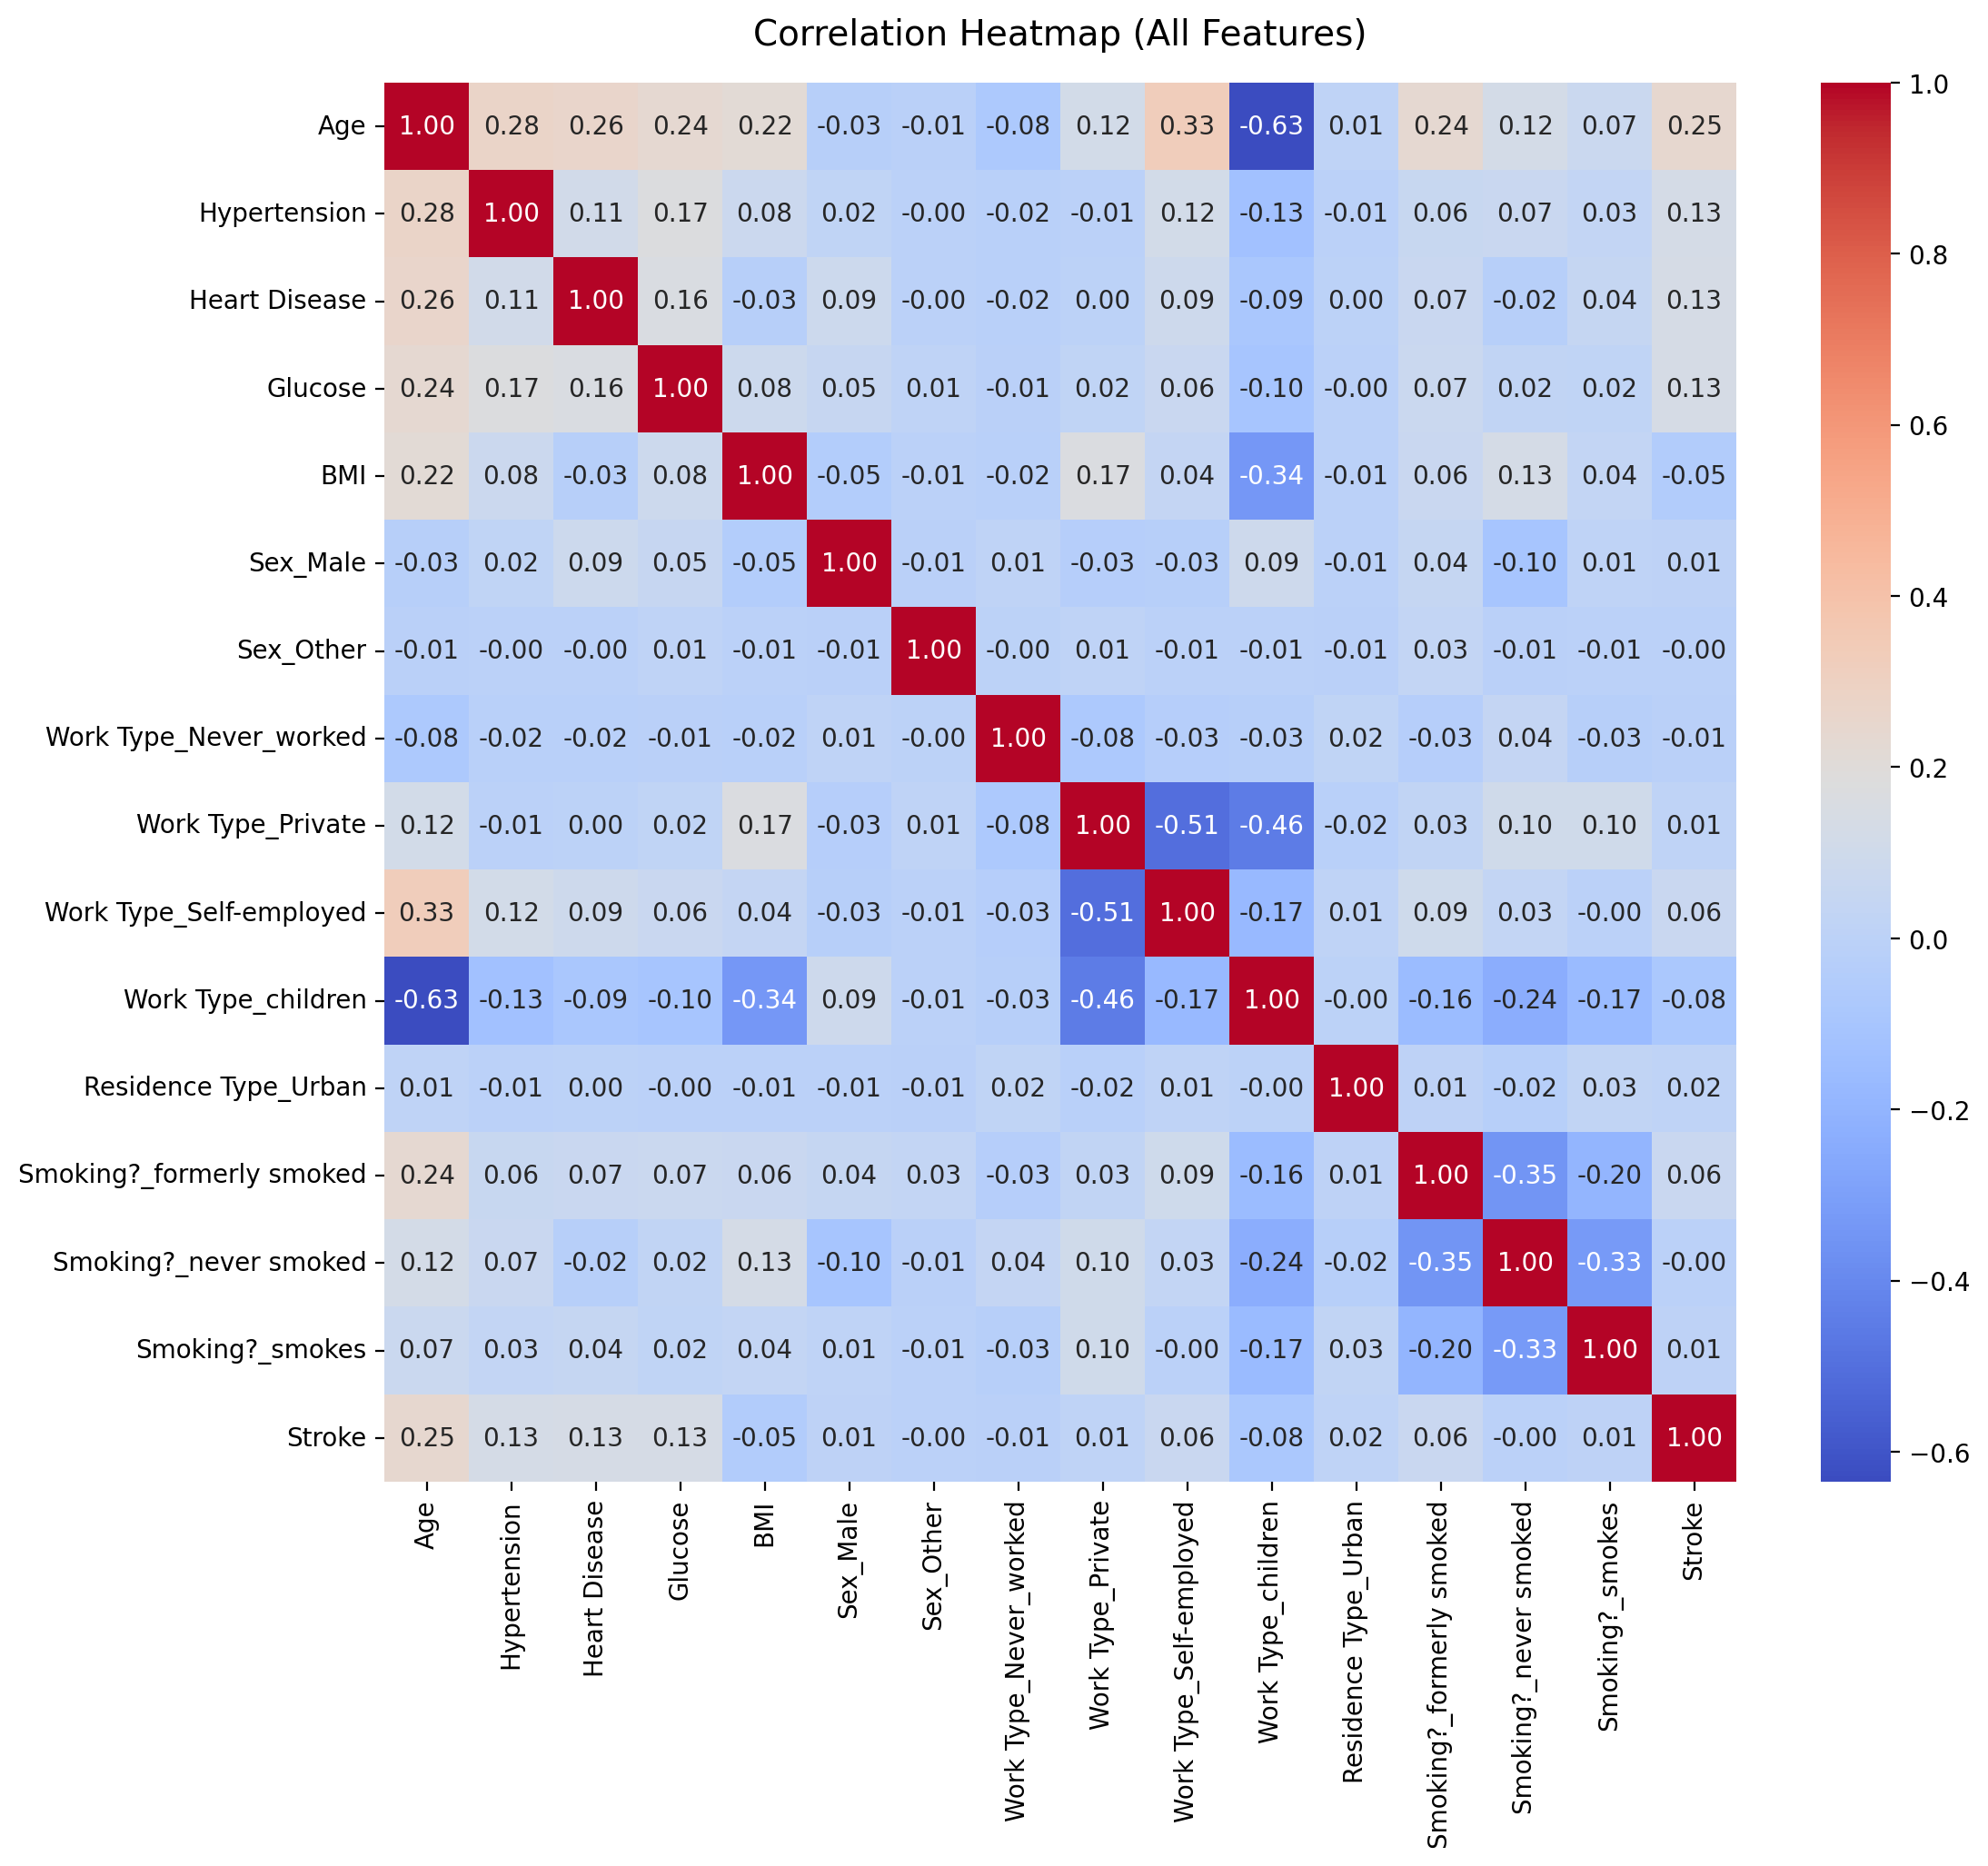

In [10]:
# === 1. Correlation matrix for all variables ===

correlations_data = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlations_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (All Features)", fontsize=14, pad=15)
plt.show()

### Reflection
Most pairwise correlations are small (≲ 0.35); Age stands out—positively related to Hypertension, Heart Disease, and Stroke (≈0.25–0.30) and to Self-employed work (≈0.33), but strongly negative with Work_Type_children (≈−0.63), indicating that category is concentrated among younger participants. Other factors (BMI, Glucose, Smoking, Sex, Residence) show only weak or negligible linear associations with Stroke (≤ ~0.13).

In [11]:
# === 2. Scatter plots ===
import plotly.express as px

selected = ["Age","Glucose","BMI"]

fig = px.scatter_matrix(
    df[selected],
    dimensions=selected,
    title="Pair Plot for Age, Glucose, BMI",
    height=800, width=1100
)
# smaller markers for dense points
for d in fig.data:
    d.update(marker=dict(color="blue", size=3, opacity=0.7))

fig.show()

### Reflection
• Age shows a clear upward trend, indicating that most values rise gradually with age distribution.
• Glucose and BMI appear widely scattered without a strong visible pattern, suggesting only weak relationships between these variables.
• A few extreme points in glucose and BMI may represent outliers or patients with special metabolic conditions.
• Overall, the variables are mostly independent, meaning each provides distinct information for understanding stroke risk.

In [17]:
# --- Diagnostic Test 3: Clustering of Patients by Risk Profile ---
import re
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# ---- set your target column name here ----
TARGET = "Stroke"

# ---- helper: detect ID-like columns to drop ----
def id_like_columns(cols):
    patt = re.compile(r"(?:^|_)(id|uuid|index|patient|record|case)(?:$|_)", re.I)
    return {c for c in cols if patt.search(str(c))}

# 1) Guard: target must exist
if TARGET not in df.columns:
    raise ValueError(f"Required target column '{TARGET}' not found in DataFrame.")

# 2) Drop target + ID-like columns
drop_cols = id_like_columns(df.columns)
drop_cols.add(TARGET)
X_all = df.drop(columns=list(drop_cols), errors="ignore").copy()

# 3) One-hot encode any non-numeric columns (booleans are already numeric)
non_num = X_all.select_dtypes(exclude=[np.number]).columns.tolist()
if non_num:
    X_all = pd.get_dummies(X_all, columns=non_num, drop_first=True)

# 4) Clean rows (remove inf / NaN)
X_all = X_all.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
if X_all.empty or X_all.shape[1] < 2:
    raise ValueError("Not enough usable features after preprocessing to run clustering.")

# Align y (Stroke) to remaining rows
y_stroke = pd.to_numeric(df.loc[X_all.index, TARGET], errors="coerce").fillna(0).astype(int)

# 5) Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_all)

# 6) KMeans (k=2)
k = 2
km = KMeans(n_clusters=k, n_init="auto", random_state=42)
raw_labels = km.fit_predict(X_std)

# 7) Align clusters to stroke prevalence (label with higher stroke rate -> 1 "Stroke-like")
rates = []
for cl in range(k):
    mask = (raw_labels == cl)
    rates.append(y_stroke[mask].mean() if mask.any() else 0.0)
stroke_like = int(np.argmax(rates))
remap = {1 - stroke_like: 0, stroke_like: 1}
aligned_labels = np.vectorize(remap.get)(raw_labels)
legend_map = {0: "No-stroke–like", 1: "Stroke–like"}

# 8) Silhouette score
sil = silhouette_score(X_std, raw_labels) if len(X_std) > k else np.nan
print(f"Silhouette score (k=2): {sil:.3f}")

# 9) PCA projection for visualization
pca = PCA(n_components=2, random_state=42)
XY = pca.fit_transform(X_std)
plot_df = pd.DataFrame(XY, columns=["PC1", "PC2"], index=X_all.index)
plot_df["Cluster"] = aligned_labels
plot_df["Stroke"] = y_stroke.map({0: "No Stroke", 1: "Stroke"})

# 10) Interactive scatter
fig_scatter = px.scatter(
    plot_df, x="PC1", y="PC2",
    color=plot_df["Cluster"].map(legend_map),
    color_discrete_map={legend_map[i]: ["#1f77b4", "#d62728"][i] for i in [0, 1]},
    symbol="Stroke", opacity=0.70,
    title="PCA Projection (K=2, clusters aligned to Stroke)",
)
fig_scatter.update_layout(height=420, margin=dict(t=36, b=10, l=10, r=10), legend_title_text="Cluster")
fig_scatter.show()

# 11) Quick cluster summary
summary = (
    pd.DataFrame({"Cluster": aligned_labels, "Stroke": y_stroke}, index=X_all.index)
    .groupby("Cluster")
    .agg(N=("Stroke", "size"), Stroke_Rate_pct=("Stroke", lambda s: 100*s.mean()))
    .assign(Label=lambda d: d.index.map(legend_map))
    .round({"Stroke_Rate_pct": 2})
    .reset_index(drop=True)
)[["Label", "N", "Stroke_Rate_pct"]]

display(summary)

Silhouette score (k=2): 0.225


,Label,N,Stroke_Rate_pct
0,No-stroke–like,710,0.28
1,Stroke–like,4400,5.61
